# Vibration Anomaly Simulation & Visualization

This notebook simulates a vibration signal using sine waves, noise, and manually injected anomalies. It visualizes the resulting signal and highlights key features like spikes and drops.

## 1. Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Generate Time Vector
We simulate a 10-second signal at a sampling frequency of 100 Hz. That gives us 1000 data points.
Time vector represents the time stamps at which measurements were taken. I defined the sampling frequency (fs) and the total duration (T) of the signal.

Sampling Frequency (fs): This defines how frequently we sample the signal. For example, a fs = 100 Hz means 100 samples per second.

Duration (T): The length of the time period over which we want to simulate the signal. In this case, T = 10 seconds.

Frequency of Vibration (freq): This is the frequency at which the vibration occurs. For simplicity, I set freq = 5 Hz, meaning the vibration repeats 5 times per second.

In [12]:
fs = 100  # Sampling frequency
T = 10    # Duration in seconds
t = np.linspace(0, T, fs * T)

## 3. Create the Vibration Signal
We simulate a 5 Hz sine wave to represent the baseline vibration. A sinusoidal signal can represent the vibration caused by some periodic source (e.g., wind, machinery). I combined this with random noise to make it more realistic.

To simulate a periodic vibration, I used a sine wave:

The equation np.sin(2 * np.pi * freq * t) generates a sine wave at the frequency specified by freq. The 2 * np.pi term converts the frequency from cycles per second (Hz) to radians per second.

This is a basic and typical way to represent periodic behavior, which is common in mechanical vibrations caused by motors, wind, or structural oscillations.

In real-world signals, especially vibration data from sensors, there's usually random noise due to various factors (sensor errors, environmental conditions, etc.). I added Gaussian noise using np.random.randn():
np.random.randn(len(t)) generates random values from a standard normal distribution (mean = 0, standard deviation = 1).
I then scaled the noise with a multiplier (0.3) to adjust its intensity.

In [13]:
freq = 5  # Frequency of the vibration (Hz)
signal = np.sin(2 * np.pi * freq * t)

# Add random Gaussian noise
noise = 0.3 * np.random.randn(len(t))
signal += noise

## 4. Inject Anomalies
Add a sudden spike and a sudden drop to simulate faults or disturbances to simulate abnormal behavior.
To simulate anomalous events (like equipment malfunction or unusual external factors), I added spikes and dips in the signal at specific intervals:

The command <signal[500:600] += 5> adds a large spike in the signal between indices 500 and 600.

Similarly, <signal[900:950] -= 4> introduces a sudden drop in the signal between indices 900 and 950.

In [14]:
# Injecting spike and drop
signal[500:600] += 5  # spike
signal[900:950] -= 4  # drop

## 5. Create DataFrame and Save to CSV

Lastly, I used Pandas to store, organize and manipulate the time and signal values for the time-series data. Then I saved the data to a CSV titled 'vibration.csv'. This will be used in the preprocessing script later on.

In [15]:
df = pd.DataFrame({'Time': t, 'Acceleration': signal})
df.to_csv('vibration.csv', index=False)
df.head()

,Time,Acceleration
0,0.00000,-0.006441
1,0.01001,0.532745
2,0.02002,0.475949
3,0.03003,0.805172
4,0.04004,0.718051


## 6. Visualize the Full Signal

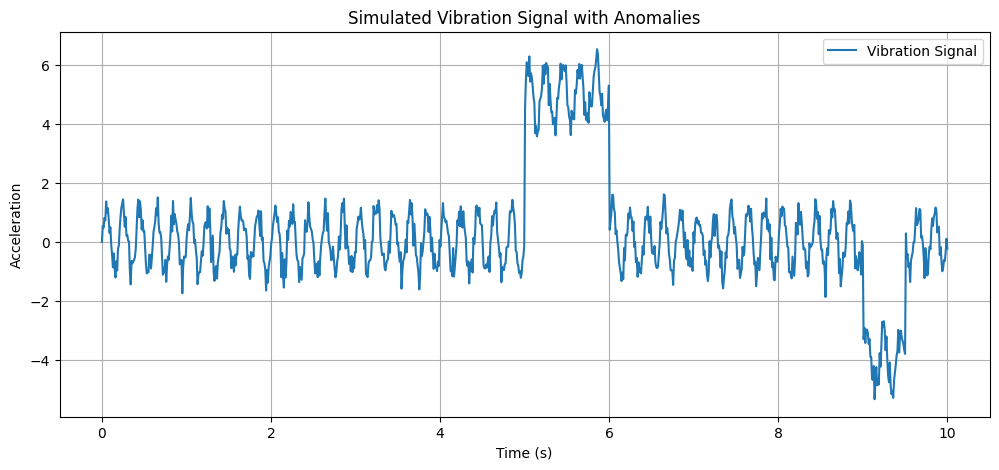

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(t, signal, label='Vibration Signal')
plt.title('Simulated Vibration Signal with Anomalies')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.grid(True)
plt.legend()
plt.show()

## 7. Zoom in to Anomaly Regions

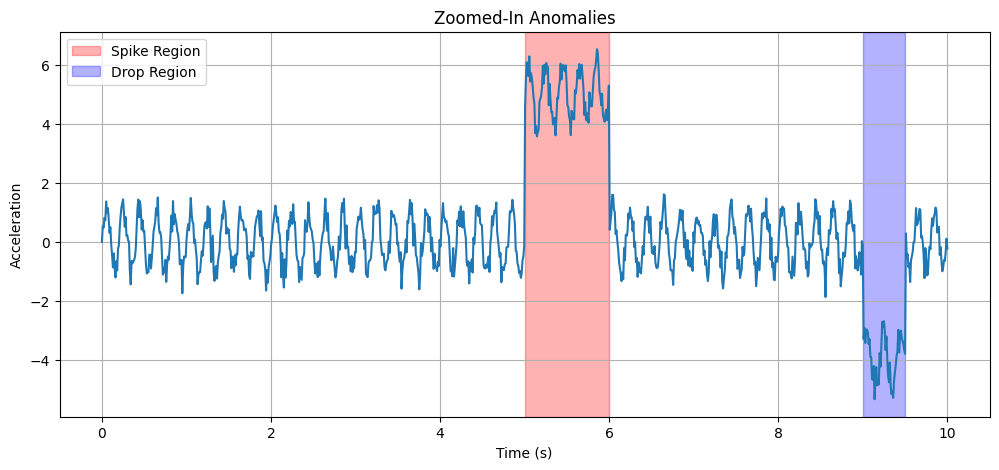

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(t, signal)
plt.axvspan(5, 6, color='red', alpha=0.3, label='Spike Region')
plt.axvspan(9, 9.5, color='blue', alpha=0.3, label='Drop Region')
plt.title('Zoomed-In Anomalies')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

> **Conclusion**: This synthetic signal is useful for testing anomaly detection pipelines, signal processing, and real-time SHM algorithms in a flexible and controlled way.